<a href="https://colab.research.google.com/github/gauravpks/dl-repo/blob/master/CNN/CNNImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

A couple utility functions to plot grayscale and RGB images:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

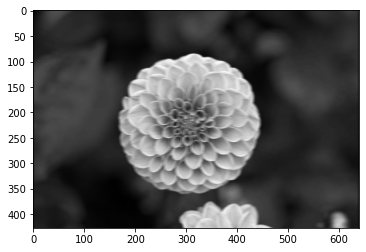

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters- one with vertical white line in middle and other with horizantal white line in middle
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") #TF low level API

plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
#plt.axis("off") 
plt.show()

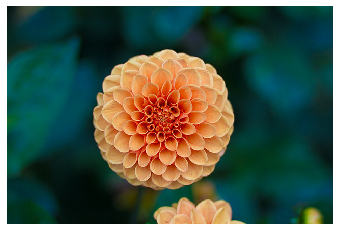

In [ ]:
plot_color_image(flower)

In [ ]:
filters[:,:,0,0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

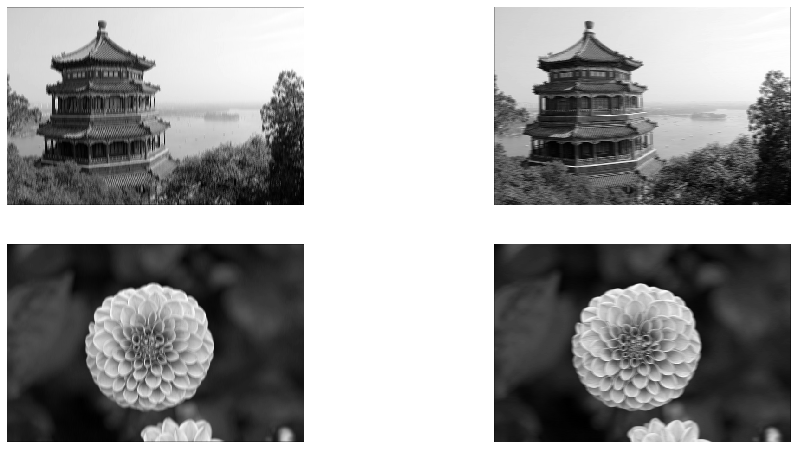

In [ ]:
plt.figure(figsize=(16,8))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

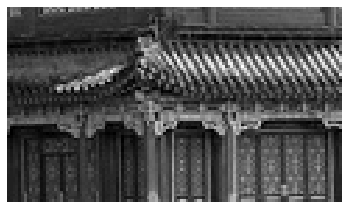

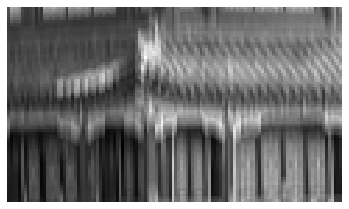

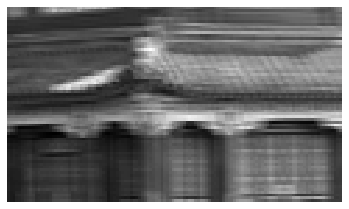

In [ ]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index in (0, 1):
    plot_image(crop(outputs[0, :, :, feature_map_index])) #"china_vertical", "china_horizontal"
    plt.show()

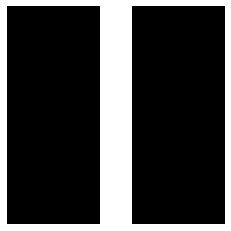

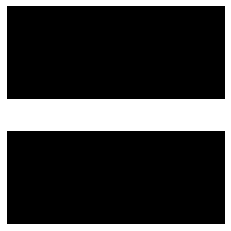

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

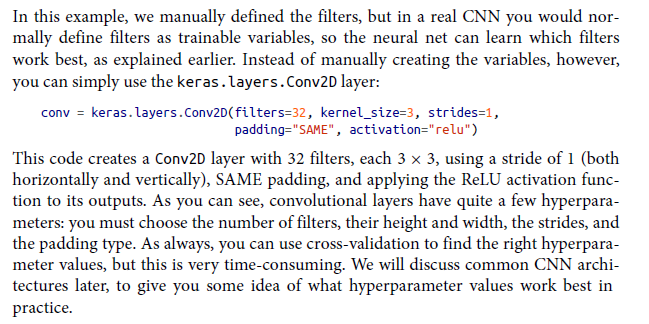

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

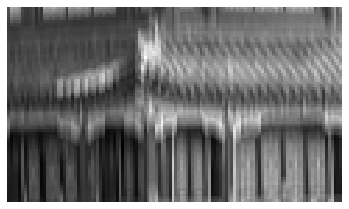

In [ ]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

#MNIST Dataset

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]


In [ ]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0081 - accuracy: 0.6388 - val_loss: 0.4374 - val_accuracy: 0.8520
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4360 - accuracy: 0.8524 - val_loss: 0.3067 - val_accuracy: 0.8864
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3742 - accuracy: 0.8743 - val_loss: 0.3231 - val_accuracy: 0.8888
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3193 - accuracy: 0.8920 - val_loss: 0.2951 - val_accuracy: 0.8956
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2983 - accuracy: 0.8986 - val_loss: 0.2983 - val_accuracy: 0.8928
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2825 - accuracy: 0.9051 - val_loss: 0.2961 - val_accuracy: 0.9016
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2706 - accuracy: 0.9092 - val_loss: 0.2813 - val_ac

In [ ]:
score

[0.30545008182525635, 0.9035999774932861]

**General Way**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(256, 3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

##MNIST Optimal Solution - Kaggle Result

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the MNIST Kaggle competition). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, and possibly create an ensemble.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3721 - accuracy: 0.8827 - val_loss: 0.0469 - val_accuracy: 0.9878
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0378 - val_accuracy: 0.9904
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0374 - val_accuracy: 0.9920
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0427 - val_accuracy: 0.9900
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0369 - val_accuracy:

[0.02724568173289299, 0.9921000003814697]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9921


[0.02724568173289299, 0.9921000003814697]

#Flower Dataset Classification

It creates an image classifier using a keras.Sequential model, and loads data using preprocessing.image_dataset_from_directory. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


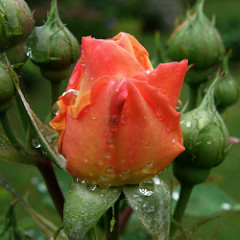

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

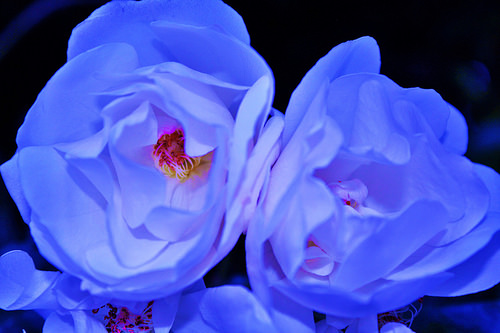

In [ ]:
PIL.Image.open(str(roses[1]))

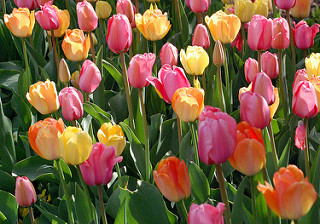

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Load using keras.preprocessing**

Load these images off disk using the helpful image_dataset_from_directory utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code. If you like, you can also write your own data loading code from scratch

In [ ]:
#Loader paramater
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Here are the first 9 images from the training dataset.**

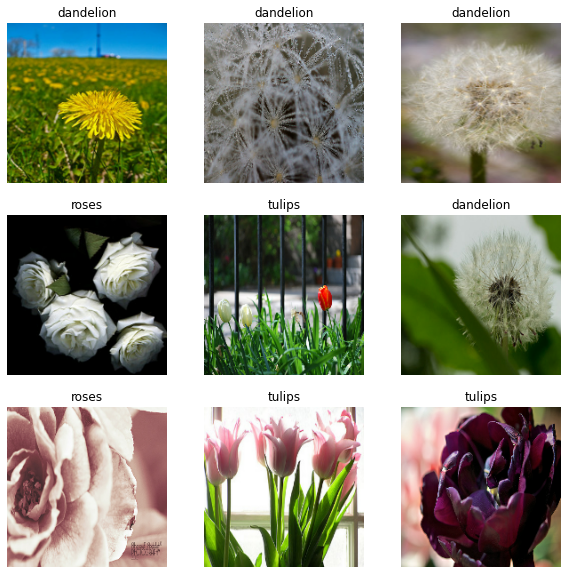

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(24, 180, 180, 3)
(24,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

**Dataset.cache()** keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

**Dataset.prefetch()** overlaps data preprocessing and model execution while training.



In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the [0, 1] range by using a Rescaling layer.

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 22, 22, 64)       

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
92/92 [==============================] - 2s 16ms/step - loss: 1.5967 - accuracy: 0.2656 - val_loss: 1.1689 - val_accuracy: 0.5150
Epoch 2/20
92/92 [==============================] - 1s 15ms/step - loss: 1.0874 - accuracy: 0.5656 - val_loss: 0.9974 - val_accuracy: 0.5858
Epoch 3/20
92/92 [==============================] - 1s 15ms/step - loss: 0.8271 - accuracy: 0.6912 - val_loss: 1.0006 - val_accuracy: 0.6172
Epoch 4/20
92/92 [==============================] - 1s 14ms/step - loss: 0.6494 - accuracy: 0.7684 - val_loss: 1.0314 - val_accuracy: 0.6172
Epoch 5/20
92/92 [==============================] - 1s 14ms/step - loss: 0.3843 - accuracy: 0.8673 - val_loss: 1.0793 - val_accuracy: 0.6131
Epoch 6/20
92/92 [==============================] - 1s 14ms/step - loss: 0.1823 - accuracy: 0.9520 - val_loss: 1.3566 - val_accuracy: 0.6362
Epoch 7/20
92/92 [==============================] - 1s 14ms/step - loss: 0.1220 - accuracy: 0.9656 - val_loss: 1.5167 - val_accuracy: 0.6553


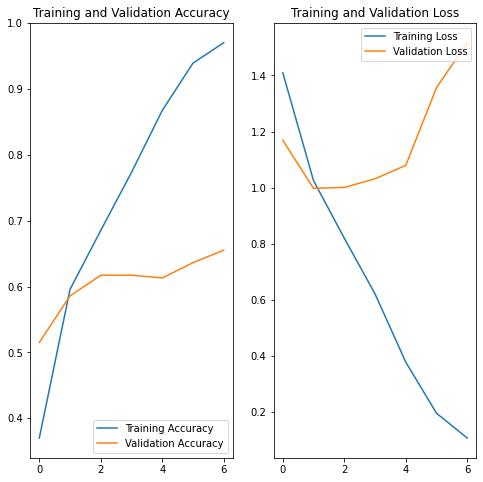

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Data Augumentation

You will implement data augmentation using the layers from tf.keras.layers.experimental.preprocessing. These can be included inside your model like other layers, and run on the GPU.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

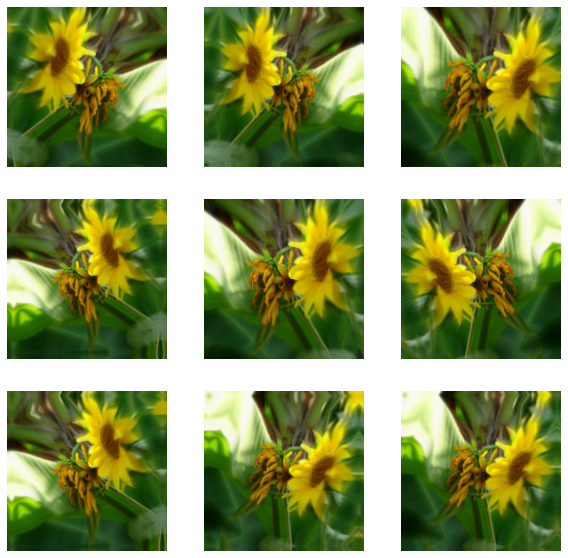

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(optimizer='nadam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 45, 45, 64)      

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
92/92 [==============================] - 3s 21ms/step - loss: 1.5666 - accuracy: 0.3471 - val_loss: 1.0420 - val_accuracy: 0.5981
Epoch 2/100
92/92 [==============================] - 2s 20ms/step - loss: 1.0772 - accuracy: 0.5656 - val_loss: 0.9428 - val_accuracy: 0.6499
Epoch 3/100
92/92 [==============================] - 2s 20ms/step - loss: 0.9523 - accuracy: 0.6329 - val_loss: 0.9277 - val_accuracy: 0.6444
Epoch 4/100
92/92 [==============================] - 2s 22ms/step - loss: 0.8496 - accuracy: 0.6808 - val_loss: 0.8054 - val_accuracy: 0.6935
Epoch 5/100
92/92 [==============================] - 2s 20ms/step - loss: 0.8214 - accuracy: 0.6921 - val_loss: 0.7882 - val_accuracy: 0.6880
Epoch 6/100
92/92 [==============================] - 2s 20ms/step - loss: 0.7562 - accuracy: 0.7120 - val_loss: 0.7828 - val_accuracy: 0.6948
Epoch 7/100
92/92 [==============================] - 2s 20ms/step - loss: 0.7305 - accuracy: 0.7237 - val_loss: 0.7460 - val_accuracy: 0.7112
Epoch 

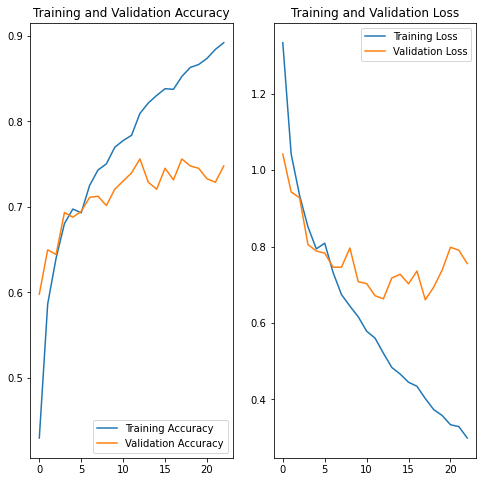

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 38.98 percent confidence.


In [ ]:
model.evaluate(val_ds)

23/23 [==============================] - 0s 7ms/step - loss: 0.6606 - accuracy: 0.7561


[0.6605662703514099, 0.7561308145523071]

**Practice with CIFAR-10 Dataset & Fashion MNIST**

##Using Other DA Technique

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(data_dir, output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3670 files [00:00, 3772.58 files/s]


In [ ]:
!ls /content/output/val

daisy  dandelion  roses  sunflowers  tulips


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',
        target_size=(150, 150),
        seed=123,
        batch_size=32,
        class_mode='binary')

Found 2934 images belonging to 5 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        '/content/output/val',
        target_size=(150, 150),
        batch_size=32,
        seed=123,
        class_mode='binary')

Found 364 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/output/test',
        target_size=(150, 150),
        batch_size=32,
        seed=123,
        class_mode='binary')

Found 372 images belonging to 5 classes.


In [ ]:
model.compile(optimizer='nadam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [ ]:
for val_image_batch, val_labels_batch in validation_generator:
  print(val_image_batch.shape)
  print(val_labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
history = model.fit(
        train_generator,
        epochs=50,
        callbacks=[checkpoint_cb, early_stopping_cb],
        validation_data=validation_generator)

Epoch 1/50
92/92 [==============================] - 84s 903ms/step - loss: 1.4369 - accuracy: 0.3449 - val_loss: 1.0651 - val_accuracy: 0.5659
Epoch 2/50
92/92 [==============================] - 82s 890ms/step - loss: 1.0755 - accuracy: 0.5726 - val_loss: 0.9316 - val_accuracy: 0.6016
Epoch 3/50
92/92 [==============================] - 82s 891ms/step - loss: 0.9641 - accuracy: 0.6275 - val_loss: 0.9269 - val_accuracy: 0.6126
Epoch 4/50
92/92 [==============================] - 82s 893ms/step - loss: 0.8705 - accuracy: 0.6624 - val_loss: 0.8017 - val_accuracy: 0.6566
Epoch 5/50
92/92 [==============================] - 82s 887ms/step - loss: 0.8504 - accuracy: 0.6729 - val_loss: 0.7527 - val_accuracy: 0.7033
Epoch 6/50
92/92 [==============================] - 82s 890ms/step - loss: 0.7834 - accuracy: 0.6970 - val_loss: 0.7770 - val_accuracy: 0.6786
Epoch 7/50
92/92 [==============================] - 82s 886ms/step - loss: 0.7625 - accuracy: 0.7091 - val_loss: 0.7468 - val_accuracy: 0.6978

In [ ]:
model.evaluate(test_generator)

12/12 [==============================] - 3s 254ms/step - loss: 0.6450 - accuracy: 0.7473


[0.6449747681617737, 0.7473118305206299]

#Optimize Using Keras Tuner

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=f005e5d9e4e842157bab751b329afc9863623f5babaf2f213fe9ef0a0eca03da
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=5a7e7f0efcf0337cbc12c197fdd9877eb78f353cb11921d90cc7daff0e636ae0
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [3]:
tf.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
train_images[0].shape

(28, 28)

In [10]:
train_images= train_images.reshape(len(train_images),28,28,1)
test_images= test_images.reshape(len(test_images),28,28,1)

In [19]:
def build_model(hp):
    model = keras.Sequential([
      keras.layers.Conv2D(
        filters = hp.Int('conv_1_filter', min_value=32, max_value=128, step =16),
        kernel_size = hp.Choice('cov_1_kernal', values =[3,5]),
        activation ='relu',
        input_shape=(28,28,1)    
      ),
      keras.layers.Conv2D(
        filters = hp.Int('conv_2_filter', min_value=32, max_value=64, step =16),
        kernel_size = hp.Choice('cov_2_kernal', values =[3,5]),
        activation ='relu'   
      ),  
      keras.layers.Flatten(),
      keras.layers.Dense(units=hp.Int('units',
                                        min_value=32,
                                        max_value=128,
                                        step=16),
        activation ='relu'   
      ), 
      keras.layers.Dense(10,activation='softmax')

    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [16]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [20]:
tuner_search = RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='my_dir', project_name='FMNIST')

In [21]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.1)


Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.9101666808128357

Best val_accuracy So Far: 0.9101666808128357
Total elapsed time: 00h 01m 39s
INFO:tensorflow:Oracle triggered exit


In [23]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
cov_1_kernal (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
cov_2_kernal (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [27]:
models = tuner_search.get_best_models(num_models=1)[0]
models

In [30]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 48)        480       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        13856     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                1769568   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 1,784,874
Trainable params: 1,784,874
Non-trainable params: 0
_________________________________________________________________
